In [1]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pprint as pp
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import math

from regression import PolynomialLibrary, TrigLibrary
import sindy_helper
from dynamicalsystems import TrainDataset
from fullSINDyAutoencoder import FullSINDyAutoencoder

In [2]:
print("Still debuging FullSINDyAutoencoder.get_dX I set the reg['dX'] = 0 in the loss args")

Still debuging FullSINDyAutoencoder.get_dX I set the reg['dX'] = 0 in the loss args


In [3]:
hyper_pers = {
    'learn_rate' : 1e-3,
    'batch_size' : 64,
    'num_epochs' : 10000,
    'num_features' : 2,
    'loss_reg' : {
        'X' : 1,
        'SINDy' : 1,
        'dX' : 0, #dX is regularization is 0 because dX_pred = None
        'Xi' : 1
    },
    'total_samples' : len(dataset),
    
}

#load data
dataset = TrainDataset()
dataloader = DataLoader(dataset=dataset, batch_size=hyper_pers['batch_size'], shuffle=True, num_workers=2)
dataiter = iter(dataloader)

#model
model = FullSINDyAutoencoder(hyper_pers['batch_size'], hyper_pers['num_features'])

optimizer = torch.optim.Adam(model.parameters(),lr=hyper_pers['learn_rate'])

losses = []

Epoch 0


/home/jovyan/work/python/fullSINDyAutoencoder.py:55: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2318.)
  return torch.matmul(J.T,dx)


30.453744888305664
Epoch 1
23.04796028137207
Epoch 2
21.44061851501465
Epoch 3
11.062906265258789
Epoch 4
5.8932623863220215
Epoch 5
3.5717315673828125
Epoch 6
2.6501080989837646
Epoch 7
1.5719256401062012
Epoch 8
0.40792423486709595
Epoch 9
0.38588616251945496
Epoch 10
0.23237344622612
Epoch 11
0.22666925191879272
Epoch 12
0.13533243536949158
Epoch 13
0.17476415634155273
Epoch 14
0.13219553232192993
Epoch 15
0.1198154017329216
Epoch 16
0.07673218101263046
Epoch 17
0.1939953863620758
Epoch 18
0.13920539617538452
Epoch 19
0.2243550568819046
Epoch 20
0.12381476163864136
Epoch 21
0.19689041376113892
Epoch 22
0.23301157355308533
Epoch 23
0.1511542797088623
Epoch 24
0.18777799606323242
Epoch 25
0.21552489697933197
Epoch 26
0.06219814345240593
Epoch 27
0.17889131605625153
Epoch 28
0.18269021809101105
Epoch 29
0.12181788682937622
Epoch 30
0.22780899703502655
Epoch 31
0.16698189079761505
Epoch 32
0.14608775079250336
Epoch 33
0.08699174225330353
Epoch 34
0.06361659616231918
Epoch 35
0.103241063

Text(0.5, 1.0, 'log loss')

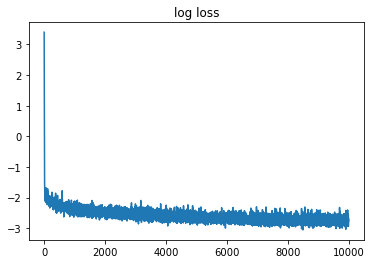

In [4]:
total_samples = len(dataset)
n_iter = math.ceil(total_samples / hyper_pers['batch_size'])
for epoch in range(hyper_pers['num_epochs']):
    print("Epoch " + str(epoch))
    l = []
    for i, (X, dX) in enumerate(dataloader):
        if X.shape[0] == hyper_pers['batch_size']:
            res = model.forward(X,dX)
            loss = model.loss(args=res,reg=hyper_pers['loss_reg'])   
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            l.append(loss.item())
    losses.append(np.mean(np.array(l)))
    print(loss.item())
    
plt.plot(np.log(np.array(losses)))
plt.title("log loss")

In [5]:
def save_model(model):
    import datetime
    timestamp = str(datetime.datetime.now())
    PATH = 'models/' + timestamp
    torch.save(model.state_dict(),PATH)

In [6]:
#save_model(model)